c:\Users\Arun Bhatnagar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
c:\Users\Arun Bhatnagar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


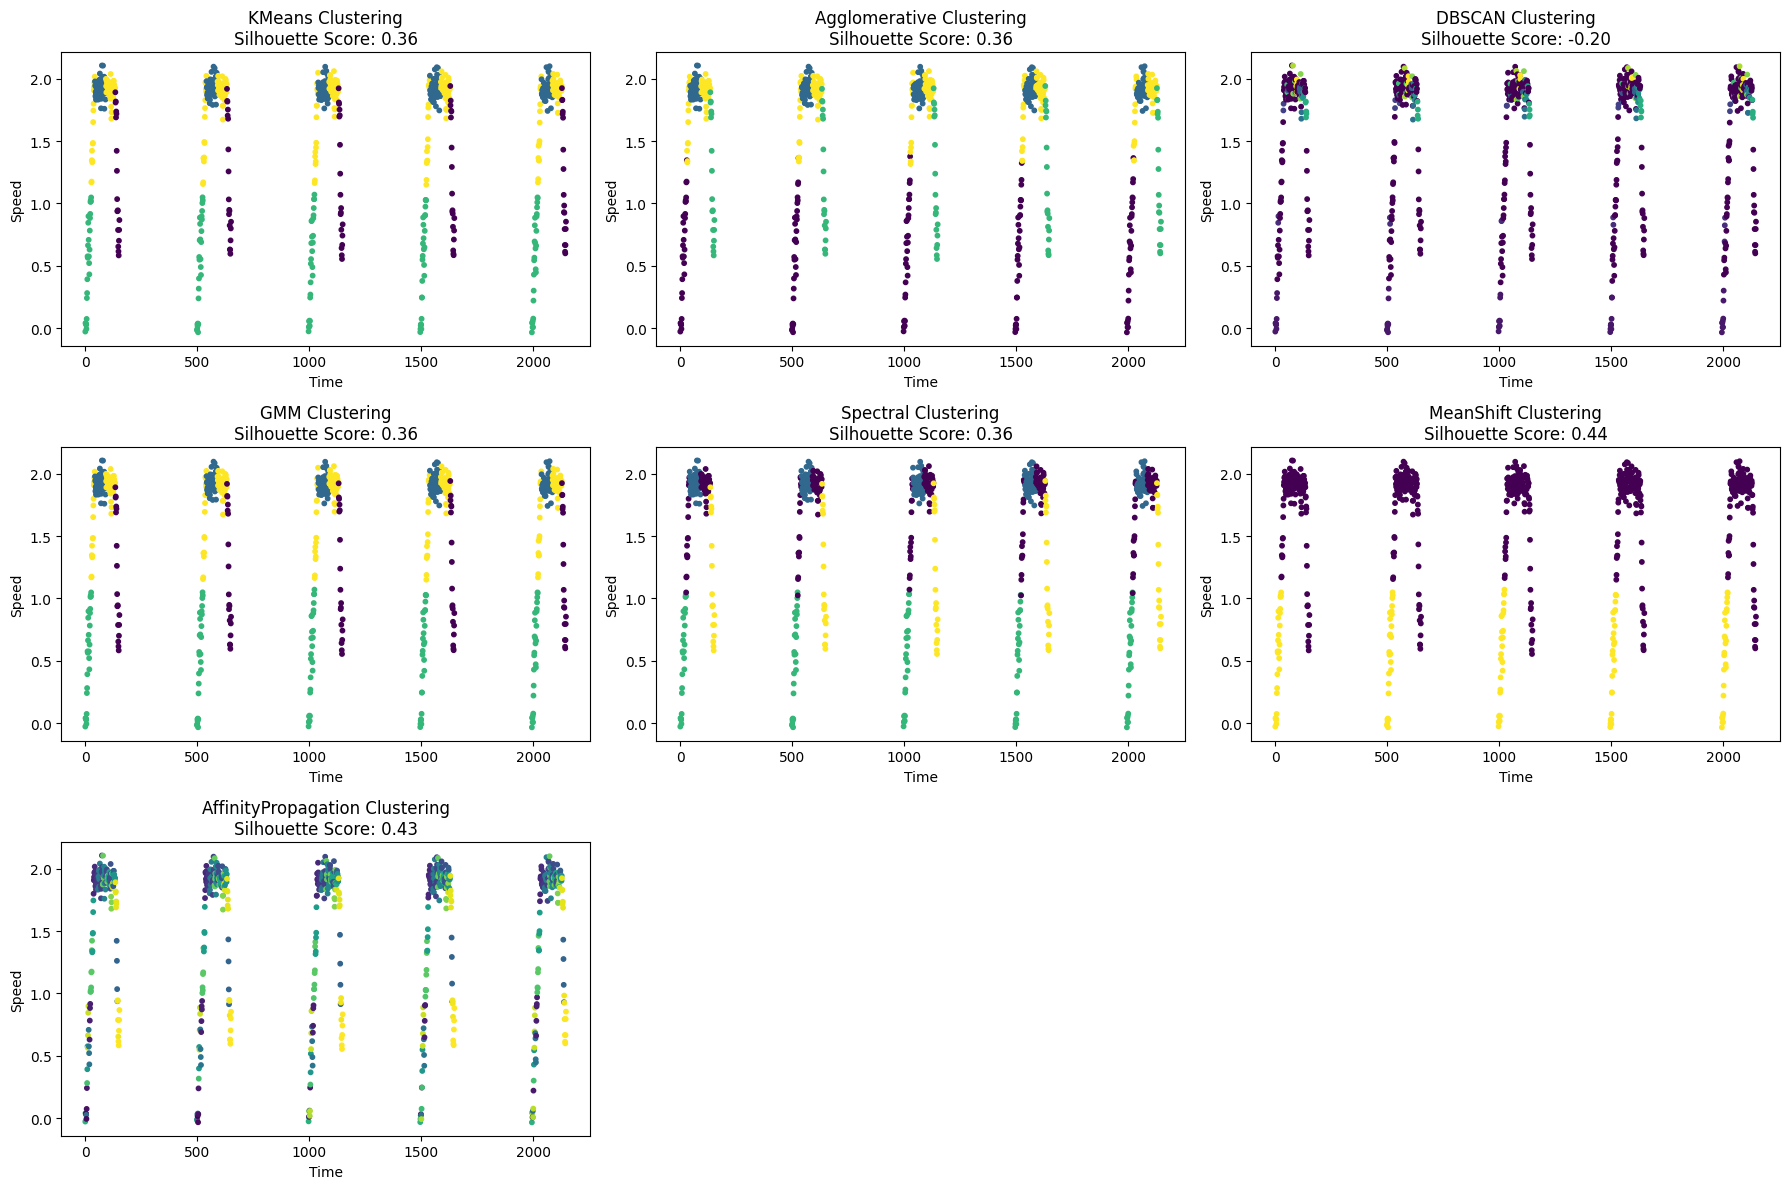


--- Comparative Battery Capacity Analysis ---

Algorithm: KMeans
Silhouette Score: 0.359470445624408
Total Avg Power (W): 190.7205
Energy Required (Wh): 31.7867
Battery Capacity (Ah): 0.8830

Algorithm: Agglomerative
Silhouette Score: 0.3557692167885396
Total Avg Power (W): 194.6107
Energy Required (Wh): 32.4351
Battery Capacity (Ah): 0.9010

Algorithm: DBSCAN
Silhouette Score: -0.20082621106576992
Total Avg Power (W): 242.8033
Energy Required (Wh): 40.4672
Battery Capacity (Ah): 1.1241

Algorithm: GMM
Silhouette Score: 0.359470445624408
Total Avg Power (W): 190.7205
Energy Required (Wh): 31.7867
Battery Capacity (Ah): 0.8830

Algorithm: Spectral
Silhouette Score: 0.35745309270943665
Total Avg Power (W): 189.6360
Energy Required (Wh): 31.6060
Battery Capacity (Ah): 0.8779

Algorithm: MeanShift
Silhouette Score: 0.43981153198034434
Total Avg Power (W): 138.4742
Energy Required (Wh): 23.0790
Battery Capacity (Ah): 0.6411

Algorithm: AffinityPropagation
Silhouette Score: 0.43064327368206

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift, SpectralClustering, AffinityPropagation
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score


def compare_clustering_algorithms(speed_df, battery_voltage, avg_trip_time_min, motor_efficiency):
    C_d = 0.24
    rho = 1.2
    A = 0.0682
    C_r = 0.01
    M = 93
    g = 9.8
    factor_inertia = 1.05
    theta = np.radians(1)

    # Extract relevant speed columns and clean data
    speed_columns = speed_df.columns[1:-1]
    speed_df_cleaned = speed_df.dropna(subset=speed_columns).reset_index(drop=True)
    X = speed_df_cleaned[speed_columns].values

    # Clustering algorithms to compare
    algorithms = {
        'KMeans': KMeans(n_clusters=4, random_state=42),
        'Agglomerative': AgglomerativeClustering(n_clusters=4),
        'DBSCAN': DBSCAN(eps=0.3, min_samples=10),
        'GMM': GaussianMixture(n_components=4, random_state=42),
        'Spectral': SpectralClustering(n_clusters=4, random_state=42),
        'MeanShift': MeanShift(),
        'AffinityPropagation': AffinityPropagation(random_state=42)
    }

    results = {}

    plt.figure(figsize=(18, 12))
    for i, (name, algorithm) in enumerate(algorithms.items(), 1):
        if name == 'GMM':
            labels = algorithm.fit_predict(X)
        else:
            labels = algorithm.fit(X).fit_predict(X)
        
        # Calculate silhouette score if applicable
        if len(set(labels)) > 1:
            silhouette = silhouette_score(X, labels)
        else:
            silhouette = np.nan

        # Calculate average speed per cluster
        unique_labels = np.unique(labels)
        avg_speed = np.array([np.mean(X[labels == label]) for label in unique_labels])

        # Power calculation per cluster
        power = (
            (0.5 * C_d * rho * A * (avg_speed ** 2)) +
            (C_r * M * g) +
            (M * g * np.sin(theta)) +
            (factor_inertia * M * avg_speed)
        ) * avg_speed / motor_efficiency

        # Calculate average power and energy required
        total_avg_power = np.mean(power)
        energy_required = total_avg_power * (avg_trip_time_min / 60)
        battery_capacity = energy_required / battery_voltage

        # Store results
        results[name] = {
            'Silhouette Score': silhouette,
            'Total Avg Power (W)': total_avg_power,
            'Energy Required (Wh)': energy_required,
            'Battery Capacity (Ah)': battery_capacity
        }

        # Plot clustering results
        plt.subplot(3, 3, i)
        plt.scatter(speed_df_cleaned.iloc[:, 0], speed_df_cleaned.iloc[:, 1], c=labels, cmap='viridis', s=10)
        plt.title(f'{name} Clustering\nSilhouette Score: {silhouette:.2f}')
        plt.xlabel('Time')
        plt.ylabel('Speed')
        
    plt.tight_layout()
    plt.show()

    # Print comparative results
    print("\n--- Comparative Battery Capacity Analysis ---")
    for name, result in results.items():
        print(f"\nAlgorithm: {name}")
        print(f"Silhouette Score: {result['Silhouette Score']}")
        print(f"Total Avg Power (W): {result['Total Avg Power (W)']:.4f}")
        print(f"Energy Required (Wh): {result['Energy Required (Wh)']:.4f}")
        print(f"Battery Capacity (Ah): {result['Battery Capacity (Ah)']:.4f}")
    
    return results


# Load the dataset
speed_df = pd.read_excel('extended_speedtime.xlsx')
battery_voltage = 36
avg_trip_time_min = 10  # 1 hour trip
motor_efficiency = 0.85  # Example efficiency

# Compare all clustering algorithms
results = compare_clustering_algorithms(speed_df, battery_voltage, avg_trip_time_min, motor_efficiency)


c:\Users\Arun Bhatnagar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
c:\Users\Arun Bhatnagar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
C:\Users\Arun Bhatnagar\AppData\Local\Temp\ipykernel_10916\2819412460.py:86: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(algorithms_list, rotation=45)
C:\Users\Arun Bhatnagar\AppData\Local\Temp\ipykernel_10916\2819412460.py:92: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1

<Figure size 1800x1200 with 0 Axes>

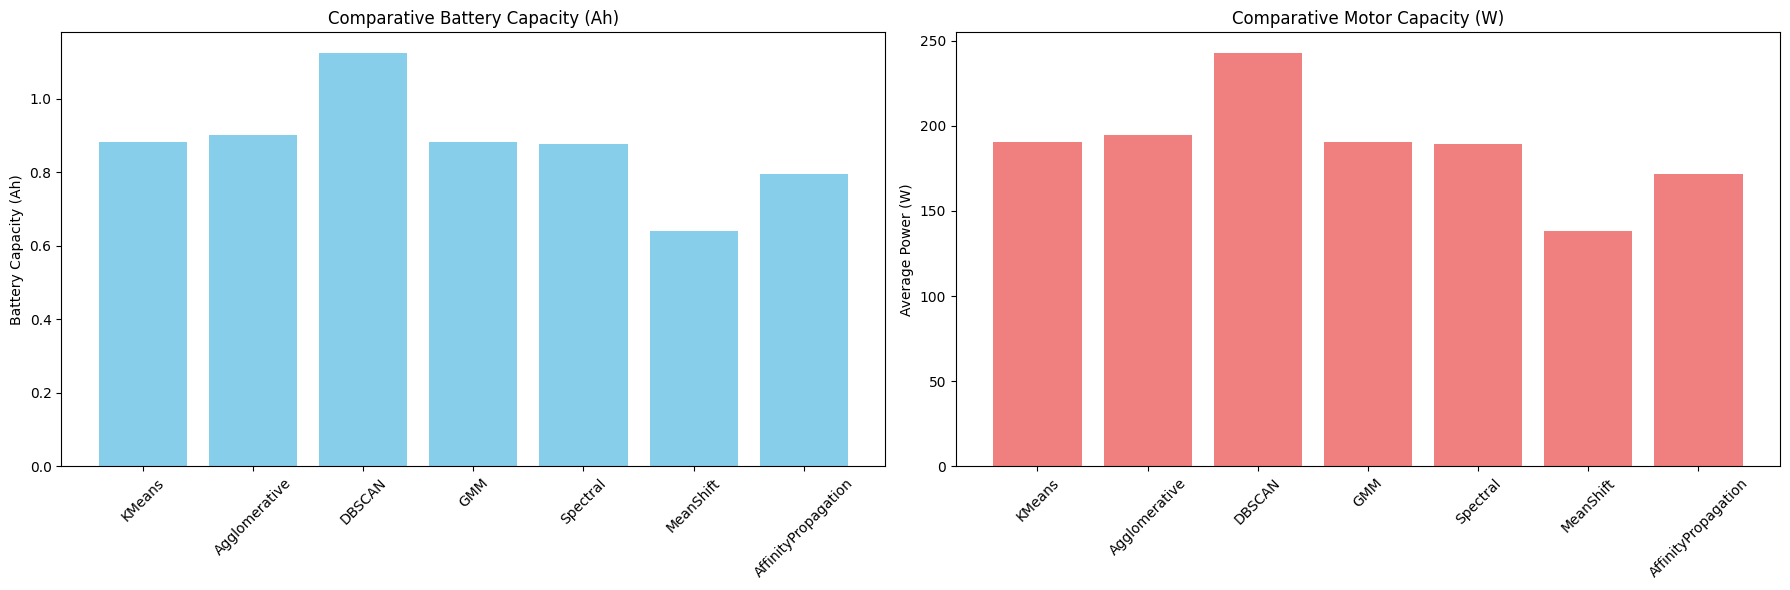


--- Comparative Battery and Motor Capacity Analysis ---

Algorithm: KMeans
Silhouette Score: 0.359470445624408
Total Avg Power (W): 190.7205
Energy Required (Wh): 31.7867
Battery Capacity (Ah): 0.8830

Algorithm: Agglomerative
Silhouette Score: 0.3557692167885396
Total Avg Power (W): 194.6107
Energy Required (Wh): 32.4351
Battery Capacity (Ah): 0.9010

Algorithm: DBSCAN
Silhouette Score: -0.20082621106576992
Total Avg Power (W): 242.8033
Energy Required (Wh): 40.4672
Battery Capacity (Ah): 1.1241

Algorithm: GMM
Silhouette Score: 0.359470445624408
Total Avg Power (W): 190.7205
Energy Required (Wh): 31.7867
Battery Capacity (Ah): 0.8830

Algorithm: Spectral
Silhouette Score: 0.35745309270943665
Total Avg Power (W): 189.6360
Energy Required (Wh): 31.6060
Battery Capacity (Ah): 0.8779

Algorithm: MeanShift
Silhouette Score: 0.43981153198034434
Total Avg Power (W): 138.4742
Energy Required (Wh): 23.0790
Battery Capacity (Ah): 0.6411

Algorithm: AffinityPropagation
Silhouette Score: 0.4306

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift, SpectralClustering, AffinityPropagation
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score


def compare_clustering_algorithms(speed_df, battery_voltage, avg_trip_time_min, motor_efficiency):
    C_d = 0.24
    rho = 1.2
    A = 0.0682
    C_r = 0.01
    M = 93
    g = 9.8
    factor_inertia = 1.05
    theta = np.radians(1)

    # Extract relevant speed columns and clean data
    speed_columns = speed_df.columns[1:-1]
    speed_df_cleaned = speed_df.dropna(subset=speed_columns).reset_index(drop=True)
    X = speed_df_cleaned[speed_columns].values

    # Clustering algorithms to compare
    algorithms = {
        'KMeans': KMeans(n_clusters=4, random_state=42),
        'Agglomerative': AgglomerativeClustering(n_clusters=4),
        'DBSCAN': DBSCAN(eps=0.3, min_samples=10),
        'GMM': GaussianMixture(n_components=4, random_state=42),
        'Spectral': SpectralClustering(n_clusters=4, random_state=42),
        'MeanShift': MeanShift(),
        'AffinityPropagation': AffinityPropagation(random_state=42)
    }

    results = {}

    plt.figure(figsize=(18, 12))
    for i, (name, algorithm) in enumerate(algorithms.items(), 1):
        if name == 'GMM':
            labels = algorithm.fit_predict(X)
        else:
            labels = algorithm.fit(X).fit_predict(X)
        
        # Calculate silhouette score if applicable
        if len(set(labels)) > 1:
            silhouette = silhouette_score(X, labels)
        else:
            silhouette = np.nan

        # Calculate average speed per cluster
        unique_labels = np.unique(labels)
        avg_speed = np.array([np.mean(X[labels == label]) for label in unique_labels])

        # Power calculation per cluster
        power = (
            (0.5 * C_d * rho * A * (avg_speed ** 2)) +
            (C_r * M * g) +
            (M * g * np.sin(theta)) +
            (factor_inertia * M * avg_speed)
        ) * avg_speed / motor_efficiency

        # Calculate average power and energy required
        total_avg_power = np.mean(power)
        energy_required = total_avg_power * (avg_trip_time_min / 60)
        battery_capacity = energy_required / battery_voltage

        # Store results
        results[name] = {
            'Silhouette Score': silhouette,
            'Total Avg Power (W)': total_avg_power,
            'Energy Required (Wh)': energy_required,
            'Battery Capacity (Ah)': battery_capacity
        }

    # Plot Comparative Battery Capacity & Motor Power Graphs
    algorithms_list = list(results.keys())
    battery_capacities = [results[algo]['Battery Capacity (Ah)'] for algo in algorithms_list]
    motor_powers = [results[algo]['Total Avg Power (W)'] for algo in algorithms_list]

    fig, ax = plt.subplots(1, 2, figsize=(18, 6))

    # Battery Capacity Plot
    ax[0].bar(algorithms_list, battery_capacities, color='skyblue')
    ax[0].set_title('Comparative Battery Capacity (Ah)')
    ax[0].set_ylabel('Battery Capacity (Ah)')
    ax[0].set_xticklabels(algorithms_list, rotation=45)

    # Motor Capacity (Average Power) Plot
    ax[1].bar(algorithms_list, motor_powers, color='lightcoral')
    ax[1].set_title('Comparative Motor Capacity (W)')
    ax[1].set_ylabel('Average Power (W)')
    ax[1].set_xticklabels(algorithms_list, rotation=45)

    plt.tight_layout()
    plt.show()

    # Print Comparative Results
    print("\n--- Comparative Battery and Motor Capacity Analysis ---")
    for name, result in results.items():
        print(f"\nAlgorithm: {name}")
        print(f"Silhouette Score: {result['Silhouette Score']}")
        print(f"Total Avg Power (W): {result['Total Avg Power (W)']:.4f}")
        print(f"Energy Required (Wh): {result['Energy Required (Wh)']:.4f}")
        print(f"Battery Capacity (Ah): {result['Battery Capacity (Ah)']:.4f}")
    
    return results


# Load the dataset
speed_df = pd.read_excel('extended_speedtime.xlsx')
battery_voltage = 36
avg_trip_time_min = 10  # 1 hour trip
motor_efficiency = 0.85  # Example efficiency

# Compare all clustering algorithms
results = compare_clustering_algorithms(speed_df, battery_voltage, avg_trip_time_min, motor_efficiency)
